In [8]:
import pandas as pd
import pickle
import itertools


In [2]:
df = pd.read_csv("/home/careinfolab/Dr_Luo/Rohan/UniSPP/AAPL_dataset.csv", index_col=0, parse_dates=True)
features = df.columns.tolist()

In [ ]:
with open("/home/careinfolab/Dr_Luo/Rohan/best_subgraph.pkl", "rb") as f:
    best_subgraph = pickle.load(f)

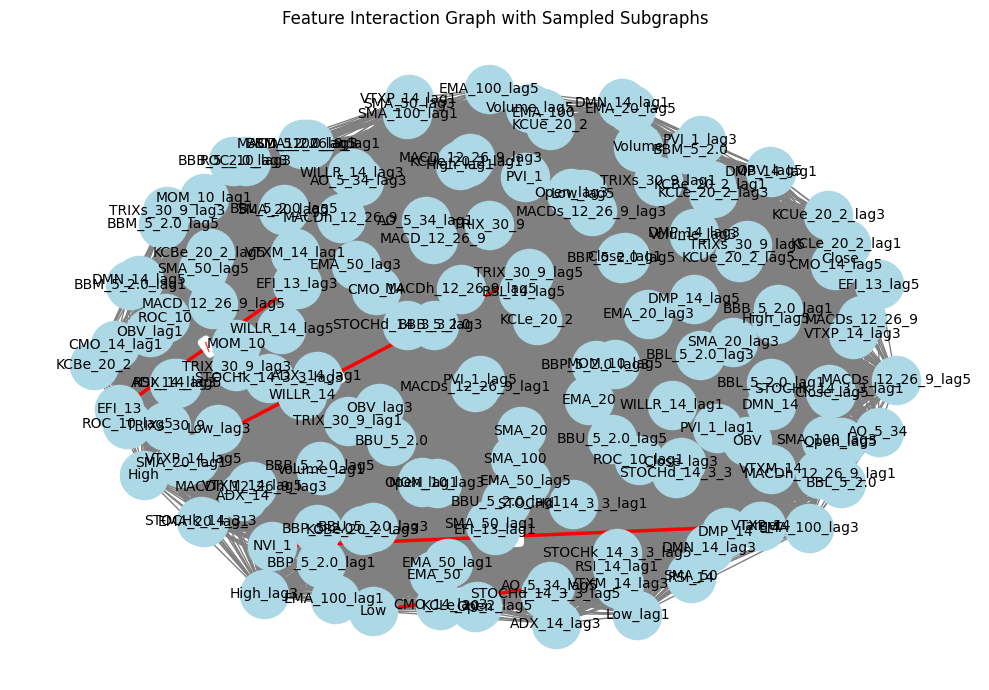

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_full_feature_graph_with_subgraph(all_features, subgraph_edges):
    full_G = nx.complete_graph(all_features)
    pos = nx.spring_layout(full_G, seed=42)
    G = nx.Graph()
    red_edges = []
    op_labels = {}

    for f1, f2 in itertools.combinations(all_features, 2):
        G.add_edge(f1, f2)
    for f1, f2, op, _ in subgraph_edges:
        if op != '∅':
            red_edges.append((f1, f2))
            op_labels[(f1, f2)] = op
    plt.figure(figsize=(10, 7))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1200)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)
    nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='red', width=2.5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=op_labels, font_color='red', font_size=9)

    plt.title("Feature Interaction Graph with Sampled Subgraphs")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_full_feature_graph_with_subgraph(all_features=features, subgraph_edges=best_subgraph)